In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import jupyter
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))

У дата сеті знаходяться 31 набір даних з іменами nyt1.csv, nyt2.csv, ..., nyt31.csv.
Кожен із них демонструє один (симульований) день показів оголошень та переходів по них, записаних на головній сторінці газети The New York Times у травні 2012 року. Кожен рядок представляє одного користувача. Існує п'ять стовпців: вік, стать (0 = жінка, 1 = чоловік), кількість показів, кількість переходів та статус авторизації.


In [2]:
datasets_files = [f'./datasets/nyt{i}.csv' for i in range(1,32)]

data_frames = [pd.read_csv(file, dtype=int) for file in datasets_files]
for df in data_frames:
    df.columns=["Age","Gender","Impressions","Clicks","Signed_In"]
result_df = pd.concat(data_frames,axis=0, ignore_index=True)



In [3]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14905865 entries, 0 to 14905864
Data columns (total 5 columns):
 #   Column       Dtype
---  ------       -----
 0   Age          int32
 1   Gender       int32
 2   Impressions  int32
 3   Clicks       int32
 4   Signed_In    int32
dtypes: int32(5)
memory usage: 284.3 MB


In [4]:
result_df.describe()

,Age,Gender,Impressions,Clicks,Signed_In
count,14905865.000,14905865.000,14905865.000,14905865.000,14905865.000
mean,26.243,0.323,5.000,0.098,0.623
std,24.129,0.468,2.236,0.319,0.485
min,0.000,0.000,0.000,0.000,0.000
25%,0.000,0.000,3.000,0.000,0.000
50%,26.000,0.000,5.000,0.000,1.000
75%,46.000,1.000,6.000,0.000,1.000
max,115.000,1.000,21.000,6.000,1.000


In [5]:
result_df['Gender'].replace({1:'Чоловік', 0:'Жінка'},inplace=True)

•	Створіть нову змінну age_group, яка агрегує користувачів як <18, 18–24, 25–34, 35–44, 45–54, 55–64 та 65+.

In [6]:
bins = [-1,18,25,35,45,55,65, result_df['Age'].max()+1]
labels = ['<18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']
result_df['age_group'] = pd.cut(result_df['Age'], bins=bins, labels=labels)
result_df

,Age,Gender,Impressions,Clicks,Signed_In,age_group
0,36,Жінка,3,0,1,35-44
1,73,Чоловік,3,0,1,65+
2,30,Жінка,3,0,1,25-34
3,49,Чоловік,3,0,1,45-54
4,47,Чоловік,11,0,1,45-54
...,...,...,...,...,...,...
14905860,41,Чоловік,4,0,1,35-44
14905861,0,Жінка,5,0,0,<18
14905862,22,Чоловік,3,0,1,18-24
14905863,59,Жінка,5,1,1,55-64


•	Зафіксуйте на діаграмі кількість показів та показник переходів (CTR = #clicks/#inmpressions) для цих шести вікових категорій.

In [7]:
age_group_ = result_df.groupby('age_group')[['Clicks','Impressions']].sum()
age_group_['CTR'] = age_group_['Clicks'] / age_group_['Impressions'] * 100
age_group_.reset_index(inplace=True)
age_group_

,age_group,Clicks,Impressions,CTR
0,<18,870621,30863133,2.821
1,18-24,55753,5575517,1.000
2,25-34,84864,8463718,1.003
3,35-44,101789,10167134,1.001
4,45-54,95372,9137803,1.044
5,55-64,127831,6299567,2.029
6,65+,120538,4015196,3.002


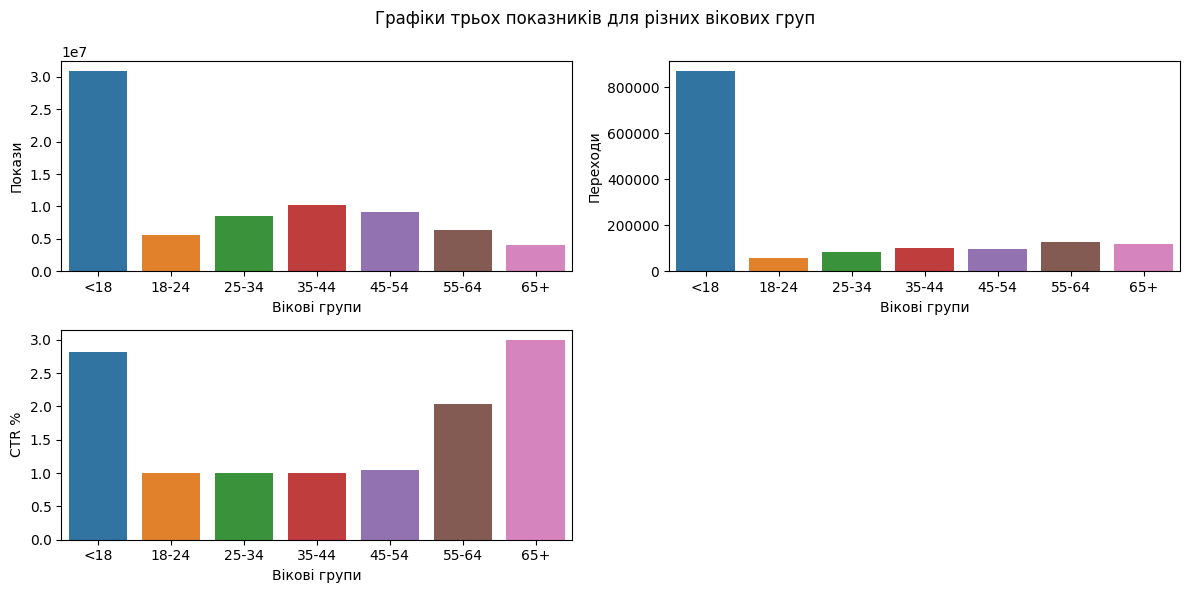

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(12, 6))

sns.barplot(data=age_group_, x='age_group', y='Impressions', ax=axes[0,0])
axes[0,0].set(ylabel='Покази', xlabel='Вікові групи')

sns.barplot(data=age_group_, x='age_group', y='Clicks', ax=axes[0,1])
axes[0,1].set(ylabel='Переходи', xlabel='Вікові групи')

sns.barplot(data=age_group_, x='age_group', y='CTR', ax=axes[1,0])
axes[1,0].set(ylabel='CTR %', xlabel='Вікові групи')

axes[1,1].axis('off')

plt.suptitle('Графіки трьох показників для різних вікових груп')
plt.tight_layout()
plt.show()

•	Вивчіть дані та проведіть візуальні та кількісні порівняння між сегментами користувачів/демографічними групами (наприклад, чоловіки старше 18 років у порівнянні з жінками старше 18 років або авторизовані та неавторизовані користувачі).

In [9]:
# Age	Gender	Impressions	Clicks	Signed_In
older_18 = result_df[result_df['Age'] > 18]
older_18_count = older_18.size
gender_group = older_18.groupby('Gender').agg(
    {'Clicks': 'mean',
     'Impressions': 'sum',
     'Signed_In': lambda x: sum(x)})
gender_group.reset_index(inplace=True)
gender_group

,Gender,Clicks,Impressions,Signed_In
0,Жінка,0.070,21373411,4275335
1,Чоловік,0.064,22285524,4459932


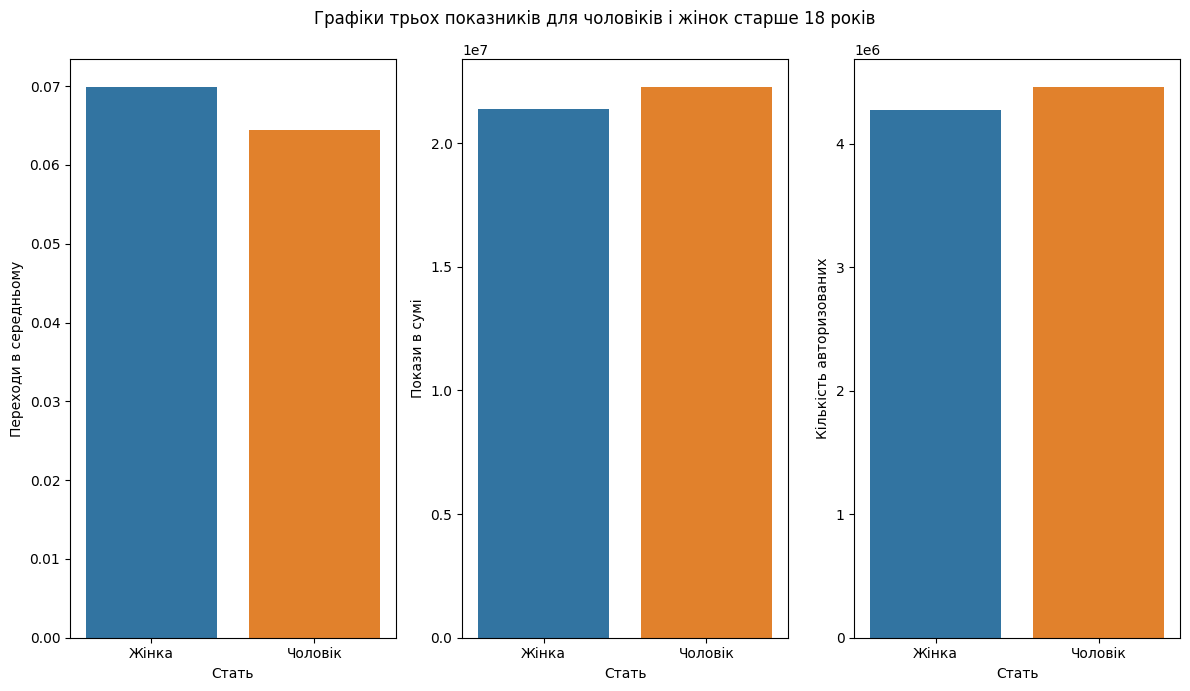

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(12, 7))

sns.barplot(data=gender_group, x='Gender', y='Clicks', ax=axes[0])
axes[0].set(ylabel='Переходи в середньому', xlabel='Стать')

sns.barplot(data=gender_group, x='Gender', y='Impressions', ax=axes[1])
axes[1].set(ylabel='Покази в сумі', xlabel='Стать')

sns.barplot(data=gender_group, x='Gender', y='Signed_In', ax=axes[2])
axes[2].set(ylabel='Кількість авторизованих', xlabel='Стать')

plt.suptitle('Графіки трьох показників для чоловіків і жінок старше 18 років')
plt.tight_layout()
plt.show()

In [11]:
authorised_users_group = result_df[result_df['Signed_In']==1].groupby(['age_group','Gender']).agg(
    {
        'Clicks':'sum',
        'Impressions':'sum'
    }
)
authorised_users_group.reset_index(inplace=True)

In [12]:
authorised_users_group

,age_group,Gender,Clicks,Impressions
0,<18,Жінка,25810,1009067
1,<18,Чоловік,48363,1779404
2,18-24,Жінка,26444,2640764
3,18-24,Чоловік,29309,2934753
4,25-34,Жінка,40253,4007824
5,25-34,Чоловік,44611,4455894
6,35-44,Жінка,48343,4810547
7,35-44,Чоловік,53446,5356587
8,45-54,Жінка,45439,4330035
9,45-54,Чоловік,49933,4807768


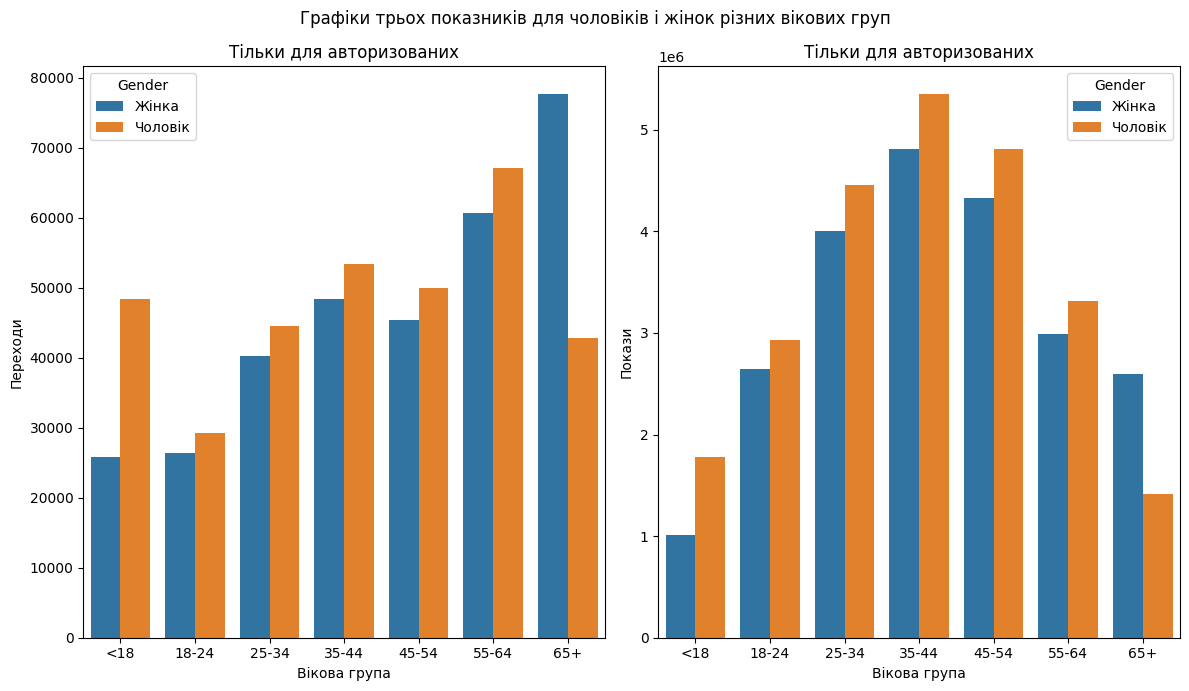

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(12, 7))

sns.barplot(data=authorised_users_group, x='age_group', y = 'Clicks', hue='Gender',ax=axes[0])
axes[0].set(ylabel='Переходи', xlabel='Вікова група', title = "Тільки для авторизованих")

sns.barplot(data=authorised_users_group, x='age_group', y = 'Impressions', hue='Gender',ax=axes[1])
axes[1].set(ylabel='Покази', xlabel='Вікова група', title = "Тільки для авторизованих")

plt.suptitle('Графіки трьох показників для чоловіків і жінок різних вікових груп')
plt.tight_layout()
plt.show()


•	Створіть метрики/вимірювання/статистику, які підсумовують дані. Приклади можливих метрик включають CTR, квантил, середнє значення, медіану, дисперсію та максимальне значення. Ці показники потрібно розрахувати за різними сегментами користувачів. Подумайте про елементи, які важливо відстежувати з часом - що стискає дані, але, як і раніше, захоплює поведінку користувача.

### Відфільтровуємо сегмент записів по ознакам : Чоловік, молодше 18, зареєстрований

In [20]:
filtered = result_df[(result_df['Signed_In'] == 1) & (result_df['Gender'] == 'Чоловік') & (result_df['age_group'] == '<18')]

CTR

In [22]:
filtered['Clicks'].sum() / filtered['Impressions'].sum() * 100

2.717932521226208

MEAN

In [23]:
filtered['Clicks'].mean()

0.13595003106192427

In [24]:
filtered['Impressions'].mean()

5.001964912675233

MEDIAN

In [ ]:
filtered['Impressions'].median()

DISPERSION

In [25]:
filtered['Impressions'].var()

5.029053877905324

QUANTILIES

In [26]:
filtered['Impressions'].quantile(0.25)

3.0

In [27]:
filtered['Impressions'].quantile(0.75)

6.0

MIN/MAX

In [28]:
filtered['Impressions'].min()

0

In [29]:
filtered['Impressions'].max()

18

### Відфільтровуємо сегмент записів по ознакам : Жінка, старше 65, зареєстрована

In [32]:
filtered = result_df[(result_df['Signed_In'] == 1) & (result_df['Gender'] == 'Жінка') & (result_df['age_group'] == '65+')]

In [47]:
print('Жінка, старше 65. Покази')
print('CTR %',filtered['Clicks'].sum() / filtered['Impressions'].sum() * 100)
print('Середнє значення : ',filtered['Impressions'].mean())
print('Медіана : ',filtered['Impressions'].median())
print('Дисперсія : ',filtered['Impressions'].var())
print('25% квантиль',filtered['Impressions'].quantile(0.25))
print('50% квантиль',filtered['Impressions'].quantile(0.50))
print('75% квантиль',filtered['Impressions'].quantile(0.75))
print('Мінімум',filtered['Impressions'].min())
print('Максимум',filtered['Impressions'].max())

Жінка, старше 65. Покази
CTR % 2.992690196319892
Середнє значення :  5.002704877635571
Медіана :  5.0
Дисперсія :  4.993000417085082
25% квантиль 3.0
50% квантиль 5.0
75% квантиль 6.0
Мінімум 0
Максимум 19


•	Результати статистичного дослідження подати у вигляді результуючого ДатаФрейма (одного), дивлячись на який можна зрозуміти і порівнювати дані за віковими підкатегоріями.

In [71]:
pivot_table = result_df[result_df['Signed_In']==1].pivot_table(index=['Gender','age_group'] , values=['Clicks','Impressions'], aggfunc='sum')
pivot_table.columns = ['Переходи','Покази']
pivot_table.index.names = ['Стать', 'Вікова група']

In [72]:
pivot_table

Переходи   Покази
Стать   Вікова група                   
Жінка   <18              25810  1009067
        18-24            26444  2640764
        25-34            40253  4007824
        35-44            48343  4810547
        45-54            45439  4330035
        55-64            60747  2985676
        65+              77767  2598565
Чоловік <18              48363  1779404
        18-24            29309  2934753
        25-34            44611  4455894
        35-44            53446  5356587
        45-54            49933  4807768
        55-64            67084  3313891
        65+              42771  1416631